# **SALES PREDICTION AND RECOMMENDATION IN TOURISM INDUSTRY**

## *N018, N027, N043, N047*

### INSTALLING THE REQUIRED LIBRARIES

In [ ]:
import scipy.stats as stats  #this contains large number of probablity distribution, correlation, etc. functions
import pandas as pd #used for data analysis
import numpy as np  #used for performing mathematical operations on arrays

import matplotlib.pyplot as plt  #is used to plot visualization graphs
import seaborn as sns  #used for data visualization and data anlysis

from sklearn.model_selection import train_test_split #used for spilitting the data into training and testing data

from sklearn import metrics  #used to measure classification performance 

from sklearn.ensemble import RandomForestClassifier  #used for making random forest
from sklearn.tree import DecisionTreeClassifier  #used for making decision trees
from sklearn.ensemble import AdaBoostClassifier  #used for adaboost
from sklearn import tree  #used for tree construction

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix   #to plot confusion matric

from sklearn.metrics import pairwise_distances  #used for calculating the distances in similarity/dissimilarity matrix
from scipy.spatial.distance import cosine,correlation 

### DATA PRE-PROCESSING

READING THE CSV FILE

In [ ]:
#Reading the csv file into a dataframe df and making a copy of the dataframe 
df=pd.read_csv("Travel.csv")

df_tour=df.copy()
print(f'There are {df_tour.shape[0]} rows and {df_tour.shape[1]} columns')

There are 4888 rows and 20 columns


PRINTING THE DATA

In [ ]:
df_tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,RoomTaken,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df_tour.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,RoomTaken,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


FINDING THE MISSING VALUES IN THE COLUMNS

In [ ]:
print ("Rows     : " , df_tour.shape[0])  #get number of rows
print ("Columns  : " , df_tour.shape[1]) #get number of columns
print ("\n\nFeatures :", df_tour.columns.tolist()) #get name of columns/features
print ("\n\nMissing values :\n", df_tour.isnull().sum().sort_values(ascending=False)) #printing the number of missing values in all columns indescending order

Rows     :  4888
Columns  :  20


Features : ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'RoomTaken', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'CustSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


Missing values :
 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
RoomTaken                     0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CustSatisfactionScore         0
CityTier                      0
OwnCar                        0
ProdTaken                 

FINDING THE DATATYPES OF THE COLUMNS

In [ ]:
#printing the data types of the columns 
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  RoomTaken                 4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

FINDING THE PERCENTILES OF THE COLUMNS

In [ ]:
#printing all the important values of the columns 
#percentile - a number that describes the value that a given percent of the values are lower than
df.describe(percentiles=[])

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


CORRECTING THE MISSPELLED WORD IN THE GENDER COLUMN

In [ ]:
#getting all the different types of values in the gender column
df_tour.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [ ]:
#correcting the wrong notation of female
df.loc[df['Gender']=='Fe Male','Gender']='Female'
df.head(30)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,RoomTaken,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


CONVERTING THE DATATYPE OF CATEGORICAL FEATURES TO CATEGORY

In [ ]:
#Converting the data type of categorical features to 'category' type
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'RoomTaken','Gender','Occupation','TypeofContact'
            ]
df_tour[cat_cols] = df_tour[cat_cols].astype('category') 
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  RoomTaken                 4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

CREATING A NEW COLUMN IN THE DATASET FOR AGEBINS AND INCOMEBINS

In [ ]:
#creating the bins for age column
df_tour['Agebin'] = pd.cut(df_tour['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [ ]:
#creating the bins for income column
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

CHECKING THE DATA TILL NOW

In [ ]:
df_tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,RoomTaken,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50,<25000
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50,<25000
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40,<20000
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40,<20000
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,NaN,<20000


In [ ]:
df=df.set_index('CustomerID')
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,RoomTaken,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,
200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
#finding out the null values
df_tour.isnull().sum() 

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
RoomTaken                     0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
CustSatisfactionScore         0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

In [ ]:
#filling up the null values in the 'type of contact' column
print("Most occuring value in the column: ",df_tour['TypeofContact'].mode())
df_tour['TypeofContact']=df_tour['TypeofContact'].fillna('Self Enquiry') #changing the null values with the mode value

Most occuring value in the column:  0    Self Enquiry
Name: TypeofContact, dtype: category
Categories (2, object): ['Company Invited', 'Self Enquiry']


In [ ]:
df_tour.groupby(["Gender",'RoomTaken'])["NumberOfFollowups"].median()
df_tour['NumberOfFollowups']=df_tour.groupby(["Gender",'RoomTaken'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

In [ ]:
df_tour['PreferredPropertyStar']=df_tour.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
df_tour[df_tour["PreferredPropertyStar"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,RoomTaken,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


In [ ]:
df_tour.groupby(['RoomTaken','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
df_tour["DurationOfPitch"] = df_tour.groupby(["RoomTaken",'NumberOfFollowups'])["DurationOfPitch"].apply(lambda x: x.fillna(x.median()))

In [ ]:
df_tour.groupby(['MaritalStatus'])["NumberOfTrips"].median()

MaritalStatus
Divorced     3.0
Married      3.0
Single       2.0
Unmarried    3.0
Name: NumberOfTrips, dtype: float64

In [ ]:
#Impute missing NumberOfTrips of pitch with median value
df_tour["NumberOfTrips"] = df_tour.groupby(["MaritalStatus"])["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))

In [ ]:
#impute the missing values in the column 'number of children visiting' with 0
df_tour['NumberOfChildrenVisiting']=df_tour['NumberOfChildrenVisiting'].fillna(0)

In [ ]:
df_tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
df_tour["Age"] = df_tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(lambda x: x.fillna(x.median()))

In [ ]:
df_tour["MonthlyIncome"]=df_tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

In [ ]:
#defining the age bins
df_tour['Agebin'] = pd.cut(df_tour['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [ ]:
#defining the income bins
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [ ]:
#checking the data if still some null values are left
df_tour.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
RoomTaken                   0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
CustSatisfactionScore       0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64

In [ ]:
df_tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,RoomTaken,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50,<25000
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50,<25000
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40,<20000
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40,<20000
4,200004,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31-40,<20000


### VISUALIZING THE DATA 

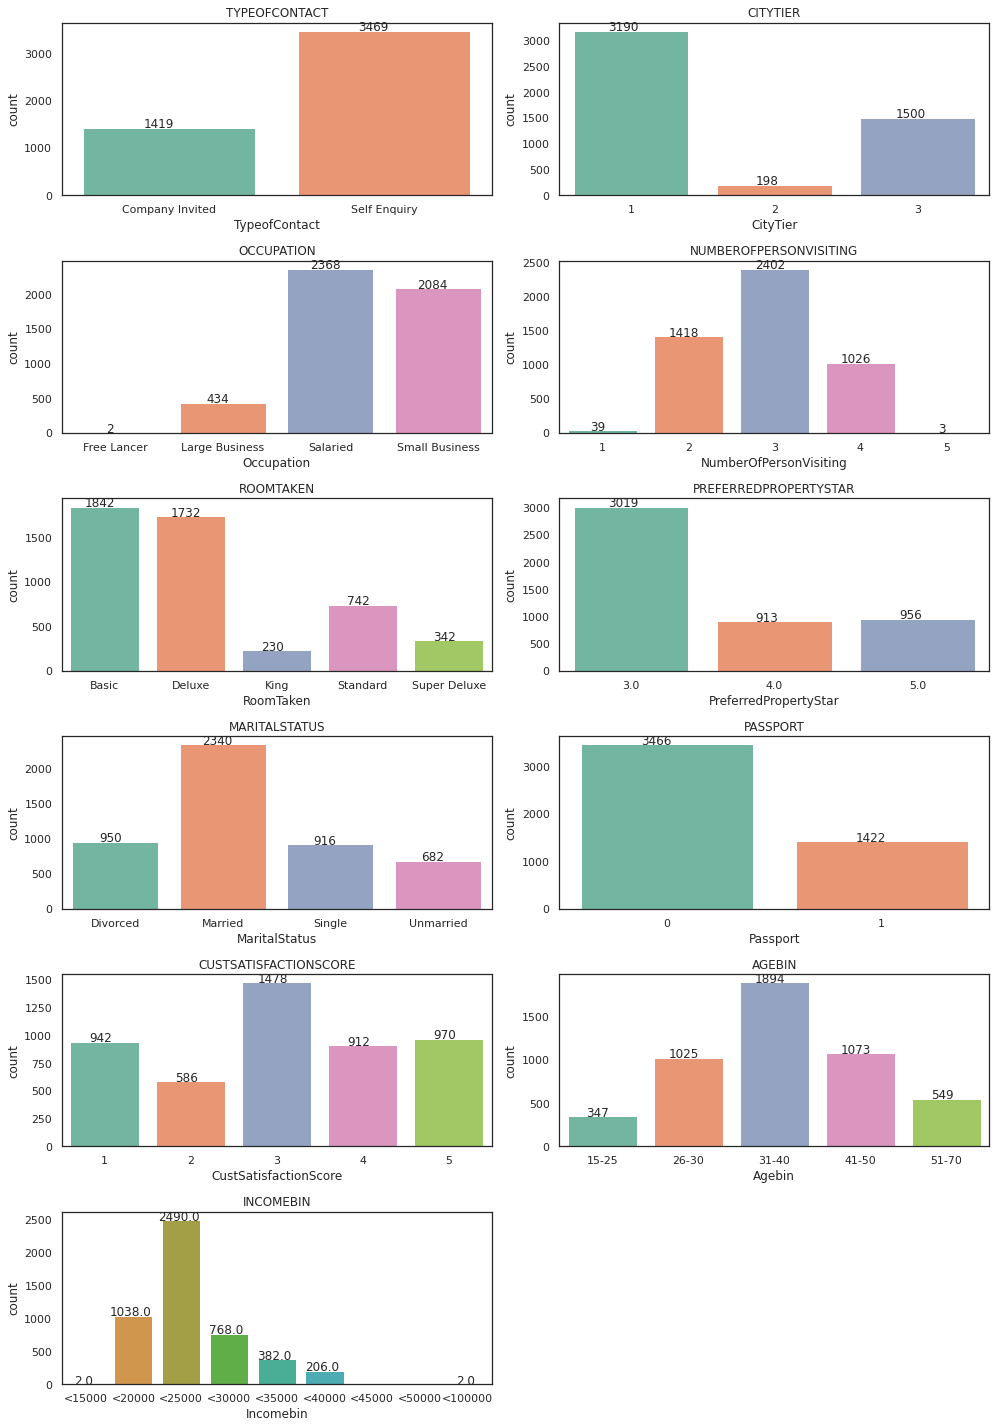

In [ ]:
plt.figure(figsize=(14,20)) #plotting the graph

sns.set_theme(style="white") #setting the background as white
cols=['TypeofContact','CityTier','Occupation','NumberOfPersonVisiting','RoomTaken','PreferredPropertyStar','MaritalStatus',
        'Passport','CustSatisfactionScore','Agebin','Incomebin']
for i, variable in enumerate(cols): #enumerate function adds a counter 
                     plt.subplot(6,2,i+1) #setting the position
                     order = df_tour[variable].value_counts(ascending=False).index #setting the values in descending order for the labels
                     sns.set_palette('Set2') #color of the graph using seaborn library
                     ax=sns.countplot(x=df_tour[variable], data=df_tour ) 
                     for p in ax.patches: #setting the shape of the bar graph
                           percentage = (p.get_height())  #setting the numbers above the bar graphs 
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())

Text(0.5, 1.0, 'Monthly Income vs Age')

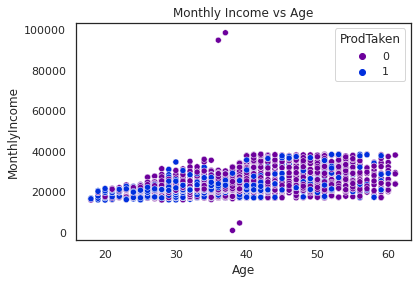

In [ ]:
sns.set_palette(sns.color_palette("nipy_spectral", 8)) #setting the colors for the graph
sns.scatterplot(y='MonthlyIncome',x='Age',hue='ProdTaken',data=df_tour) #setting the x and y axis value
plt.title('Monthly Income vs Age') #setting the title for the graph

Text(0.5, 1.0, 'Agebin Product wise')

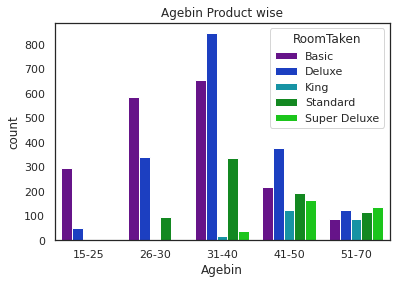

In [ ]:
sns.countplot(x='Agebin',hue='RoomTaken',data=df_tour).set_title('Agebin Product wise')

Text(0.5, 1.0, 'Incomebin Room Taken')

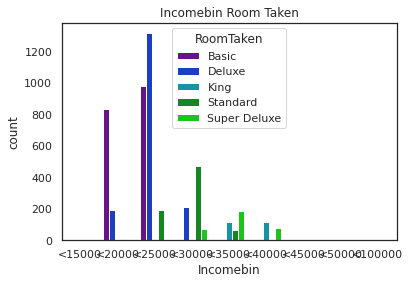

In [ ]:
sns.countplot(x='Incomebin',hue='RoomTaken',data=df_tour).set_title('Incomebin Room Taken')

Text(0.5, 1.0, 'Age vs Room Taken')

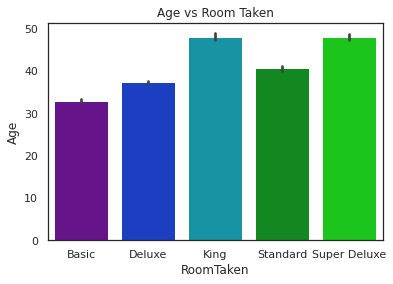

In [ ]:
sns.barplot(y='Age',x='RoomTaken',data=df_tour).set_title('Age vs Room Taken')

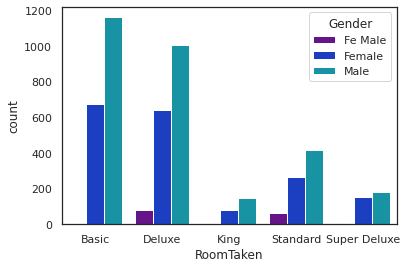

In [ ]:
sns.countplot(x="RoomTaken", data=df_tour, hue="Gender")

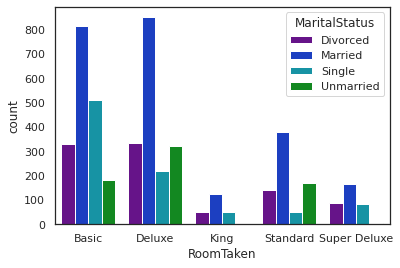

In [ ]:
sns.countplot(x="RoomTaken", data=df_tour, hue="MaritalStatus")

Text(0.5, 1.0, 'Monthly Income vs Room Taken')

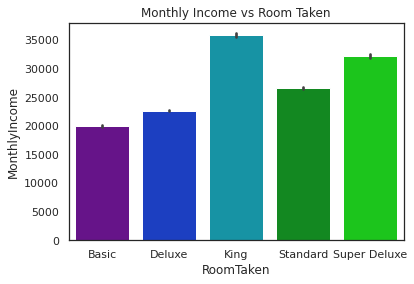

In [ ]:
sns.barplot(y='MonthlyIncome',x='RoomTaken',data=df_tour).set_title('Monthly Income vs Room Taken')

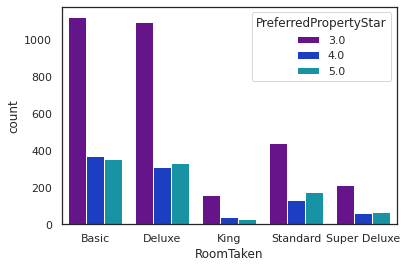

In [ ]:
sns.countplot(x="RoomTaken", data=df_tour,  hue="PreferredPropertyStar")

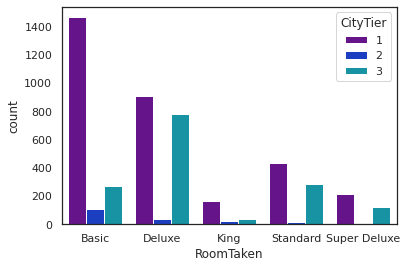

In [ ]:
sns.countplot(x="RoomTaken", data=df_tour,  hue="CityTier")

### MODEL-1: DECISION TREE

In [ ]:
X = df_tour.drop(['ProdTaken','CustSatisfactionScore','RoomTaken','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1) 
X = pd.get_dummies(X,drop_first=True)
y = df_tour['ProdTaken']

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3421, 24), (1467, 24))

In [ ]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1) 
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No","Yes"])
    disp.plot(cmap='Greens',ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0) #changing the appearance of the labels and values, etc.
    plt.grid(b=None,axis='both',which='both',visible=False) #for showing or removing the grid lines inside the matrix
    plt.show()

In [ ]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):

    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [ ]:
#defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

In [ ]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80}) #random state defines the internal number for spillting the data, class_weight basically tells which class to focus more on
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.2, 1: 0.8},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.834356,1.0,0.561594,1.0,0.559567,1.0,0.560579


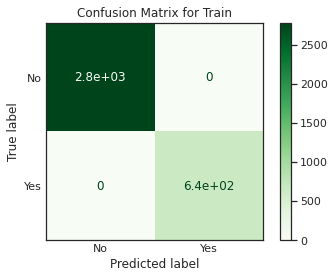

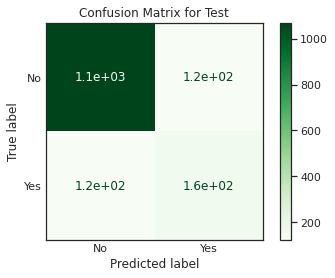

In [ ]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

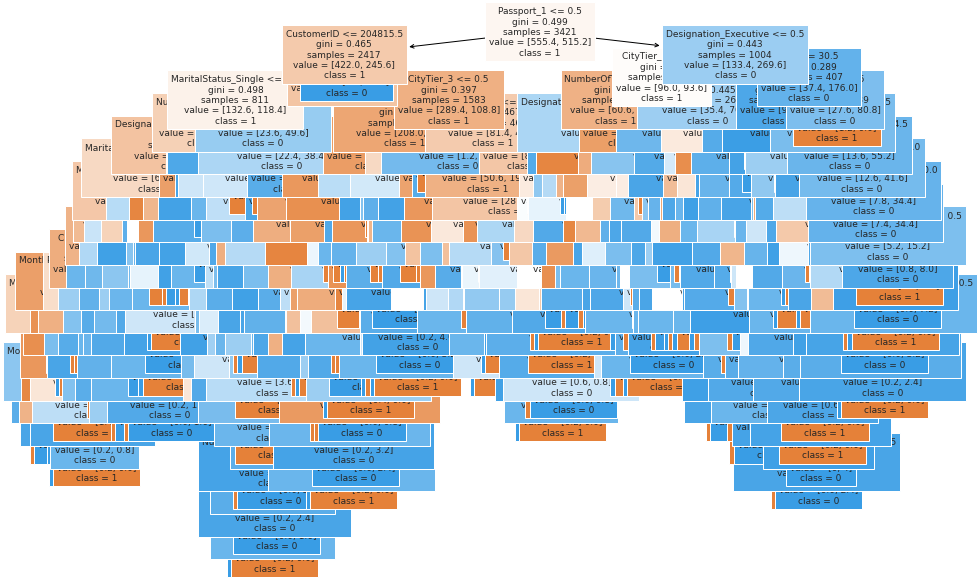

In [ ]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns #getting the columns from the training data
out = tree.plot_tree(dtree,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out: #loop for making the tree
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black') 
        arrow.set_linewidth(1)
plt.show()

                                 Imp
MonthlyIncome               0.178082
Age                         0.140651
CustomerID                  0.120095
Passport_1                  0.085242
NumberOfTrips               0.079860
PreferredPropertyStar       0.052584
Designation_Executive       0.047060
CityTier_3                  0.041436
MaritalStatus_Single        0.027753
NumberOfPersonVisiting      0.022997
OwnCar_1                    0.022765
MaritalStatus_Married       0.020710
NumberOfChildrenVisiting    0.020492
Designation_Manager         0.019158
CityTier_2                  0.016457
Occupation_Salaried         0.016449
Gender_Male                 0.016000
MaritalStatus_Unmarried     0.013676
TypeofContact_Self Enquiry  0.013178
Designation_Senior Manager  0.012601
Occupation_Small Business   0.011436
Gender_Female               0.009728
Occupation_Large Business   0.008827
Designation_VP              0.002764


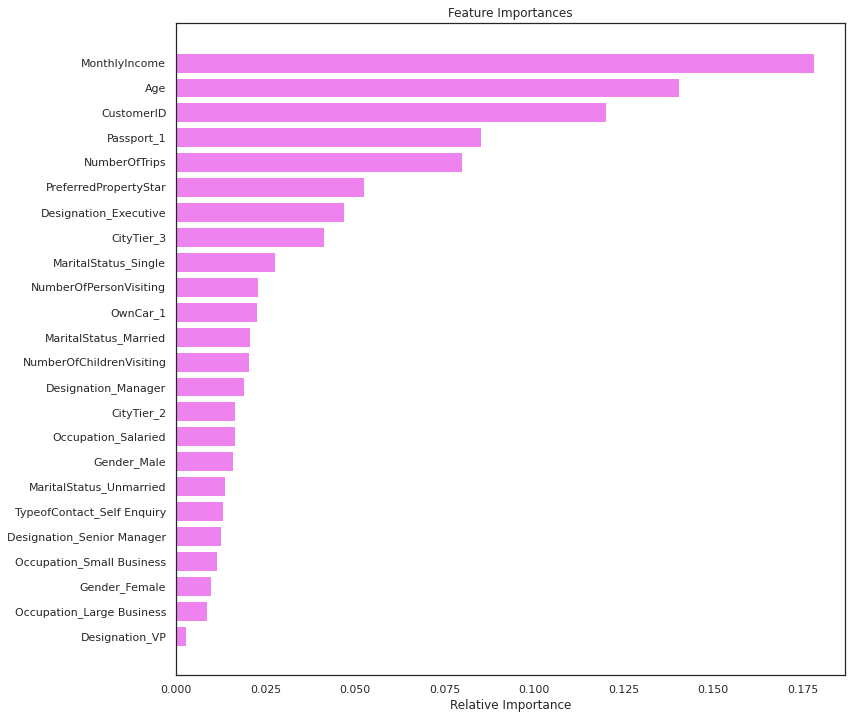

In [ ]:
feature_names = X_train.columns
importances = dtree.feature_importances_
indices = np.argsort(importances)  #Returns the indices that would sort an array
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)) #printing the list in descending order

plt.figure(figsize=(12,12))
plt.title('Feature Importances') #title for the whole graph
plt.barh(range(len(indices)), importances[indices], color='violet', align='center') #creating horizontal bar plot
plt.yticks(range(len(indices)), [feature_names[i] for i in indices]) #labels on the y axis
plt.xlabel('Relative Importance') #title for the x axis
plt.show()

### MODEL-2: RANDOM FOREST

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.888889,1.0,0.456522,1.0,0.906475,1.0,0.607229


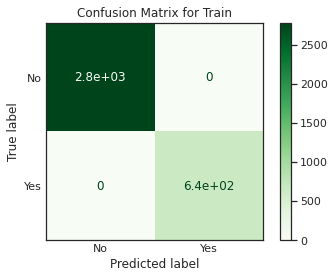

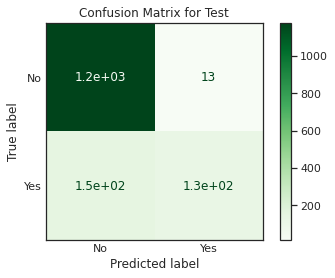

In [ ]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

                                 Imp
CustomerID                  0.146280
MonthlyIncome               0.145334
Age                         0.140339
NumberOfTrips               0.074304
Passport_1                  0.068483
PreferredPropertyStar       0.045283
NumberOfChildrenVisiting    0.038206
NumberOfPersonVisiting      0.032882
Designation_Executive       0.029446
CityTier_3                  0.029112
MaritalStatus_Single        0.027926
TypeofContact_Self Enquiry  0.027706
OwnCar_1                    0.026196
Gender_Male                 0.019792
Occupation_Small Business   0.019754
Gender_Female               0.019325
Occupation_Salaried         0.018944
MaritalStatus_Married       0.018280
MaritalStatus_Unmarried     0.016957
Designation_Manager         0.016785
Occupation_Large Business   0.014138
CityTier_2                  0.010587
Designation_Senior Manager  0.010511
Designation_VP              0.003430


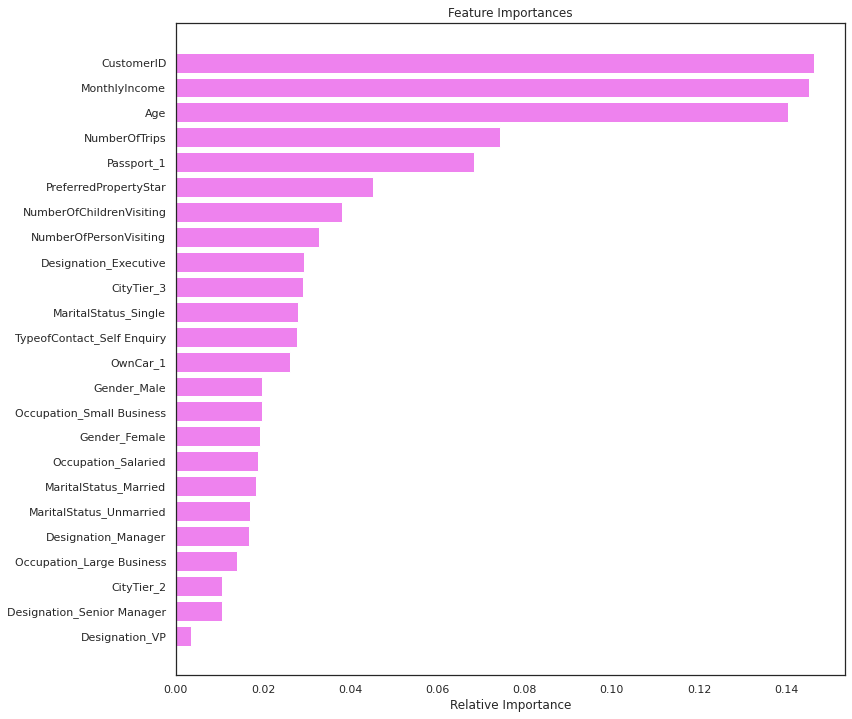

In [ ]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### MODEL-3: ADABOOST

In [ ]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.85969,0.862304,0.343168,0.380435,0.794964,0.772059,0.479393,0.509709


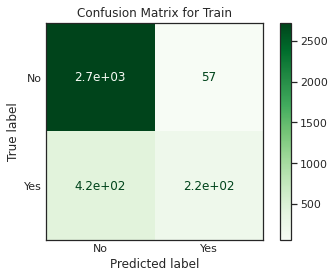

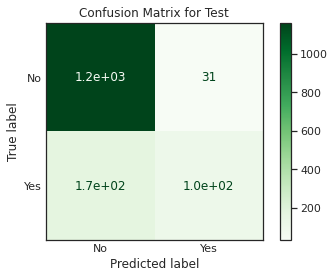

In [ ]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

                             Imp
MonthlyIncome               0.30
CustomerID                  0.22
Age                         0.16
PreferredPropertyStar       0.04
NumberOfTrips               0.04
Passport_1                  0.04
Designation_Senior Manager  0.02
Designation_Executive       0.02
MaritalStatus_Unmarried     0.02
MaritalStatus_Single        0.02
Designation_VP              0.02
Occupation_Large Business   0.02
CityTier_3                  0.02
CityTier_2                  0.02
TypeofContact_Self Enquiry  0.02
NumberOfPersonVisiting      0.02
Occupation_Salaried         0.00
Gender_Female               0.00
Gender_Male                 0.00
MaritalStatus_Married       0.00
OwnCar_1                    0.00
NumberOfChildrenVisiting    0.00
Designation_Manager         0.00
Occupation_Small Business   0.00


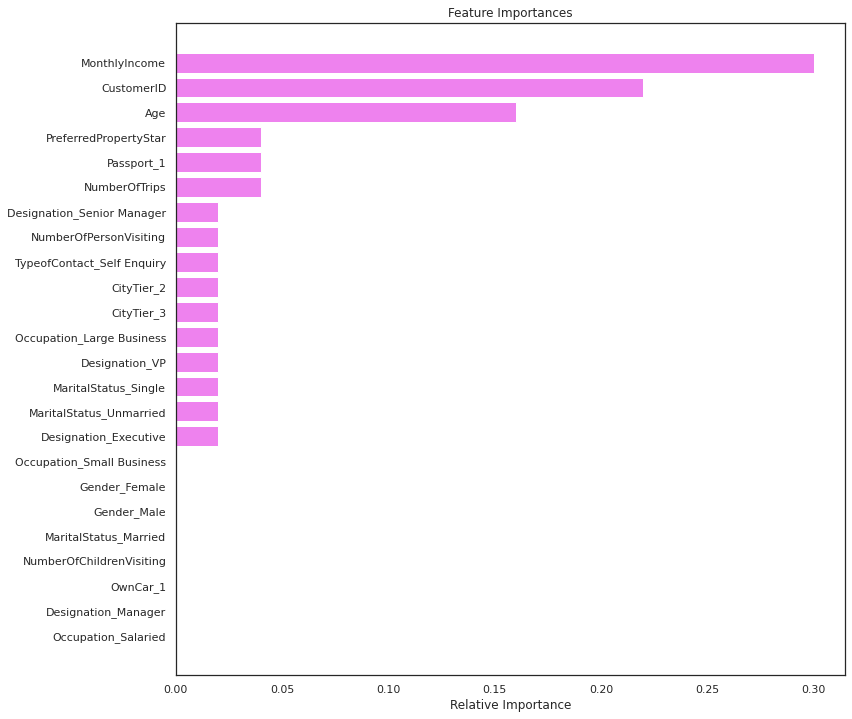

In [ ]:
feature_names = X_train.columns
importances = adaboost.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(adaboost.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### MODEL-4: SIMILARITY MATRICES FOR DIFFERENT FEATURES

In [ ]:
satisfaction_matrix=df_tour.pivot_table(index=['CustSatisfactionScore'],columns=['RoomTaken'],values='Age')
satisfaction_matrix.fillna(0,inplace=True)
satisfaction_matrix

RoomTaken,Basic,Deluxe,King,Standard,Super Deluxe
CustSatisfactionScore,,,,,
1,33.695531,37.019886,49.900000,40.609589,47.021739
2,33.196078,37.909091,50.029412,41.284314,45.115385
3,32.836364,36.947464,47.541667,39.747525,47.388889
4,33.033333,36.835714,47.300000,39.638889,49.125000
5,32.014706,38.271341,46.741379,42.114865,49.583333


In [ ]:
satisfaction_similarity=1-pairwise_distances(satisfaction_matrix.to_numpy(),metric="cosine")
np.fill_diagonal(satisfaction_similarity,0)
satisfaction_matrix=pd.DataFrame(satisfaction_similarity)
satisfaction_matrix.head()

,0,1,2,3,4
0,0.000000,0.999717,0.999764,0.999338,0.998698
1,0.999717,0.000000,0.999253,0.998450,0.998160
2,0.999764,0.999253,0.000000,0.999851,0.999461
3,0.999338,0.998450,0.999851,0.000000,0.999536
4,0.998698,0.998160,0.999461,0.999536,0.000000


In [ ]:
satisfaction_matrix1=df_tour.pivot_table(index=['Gender'],columns=['RoomTaken'],values='CustSatisfactionScore')
satisfaction_matrix1.fillna(0,inplace=True)
satisfaction_matrix1

RoomTaken,Basic,Deluxe,King,Standard,Super Deluxe
Gender,,,,,
Fe Male,4.000000,2.746988,0.000000,3.158730,3.400000
Female,3.085799,2.901716,3.390244,3.205323,3.464516
Male,3.075731,3.095238,3.135135,2.956731,3.263736


In [ ]:
satisfaction_similarity1=1-pairwise_distances(satisfaction_matrix1.to_numpy(),metric="cosine")
np.fill_diagonal(satisfaction_similarity1,0)
satisfaction_matrix1=pd.DataFrame(satisfaction_similarity1)
satisfaction_matrix1.head()

,0,1,2
0,0.000000,0.874364,0.884131
1,0.874364,0.000000,0.998546
2,0.884131,0.998546,0.000000


In [ ]:
room_matrix=df_tour.pivot_table(index=['CityTier'],columns=['RoomTaken'],values='CustSatisfactionScore')
room_matrix.fillna(0,inplace=True)
room_matrix

RoomTaken,Basic,Deluxe,King,Standard,Super Deluxe
CityTier,,,,,
1,3.096862,3.057269,3.345238,3.091743,3.462264
2,2.962963,3.400000,2.272727,2.777778,3.000000
3,3.044776,2.928571,3.250000,3.034722,3.200000


In [ ]:
roci_similarity=1-pairwise_distances(room_matrix.to_numpy(),metric="cosine")
np.fill_diagonal(roci_similarity,0)
roci_matrix=pd.DataFrame(roci_similarity)
roci_matrix.head()

,0,1,2
0,0.000000,0.988002,0.999726
1,0.988002,0.000000,0.987616
2,0.999726,0.987616,0.000000


In [ ]:
cust_matrix=df_tour.pivot_table(index=['CityTier'],columns=['Incomebin'],values='NumberOfPersonVisiting')
cust_matrix.fillna(0,inplace=True)
cust_matrix

Incomebin,<15000,<20000,<25000,<30000,<35000,<40000,<100000
CityTier,,,,,,,
1,2.5,2.456209,3.086957,3.000000,2.760456,3.361111,2.5
2,0.0,2.312500,3.031579,3.045455,2.294118,3.250000,0.0
3,0.0,2.404444,2.893564,3.235110,2.901961,3.413043,0.0


In [ ]:
cust_similarity=1-pairwise_distances(cust_matrix.to_numpy(),metric="cosine")
np.fill_diagonal(cust_similarity,0)
cust_matrix=pd.DataFrame(cust_similarity)
cust_matrix.head()

,0,1,2
0,0.000000,0.879537,0.880211
1,0.879537,0.000000,0.996340
2,0.880211,0.996340,0.000000


In [ ]:
city_matrix1=df_tour.pivot_table(index=['CityTier'],columns=['Incomebin'],values='CustSatisfactionScore')
city_matrix1.fillna(0,inplace=True)
city_matrix1

Incomebin,<15000,<20000,<25000,<30000,<35000,<40000,<100000
CityTier,,,,,,,
1,5.0,3.078431,3.097038,3.077283,3.311787,3.409722,2.0
2,0.0,3.020833,3.063158,2.863636,2.647059,2.625000,0.0
3,0.0,3.057778,2.980198,2.962382,3.068627,3.173913,0.0


In [ ]:
inci_similarity=1-pairwise_distances(city_matrix1.to_numpy(),metric="cosine")
np.fill_diagonal(inci_similarity,0)
inci_matrix=pd.DataFrame(inci_similarity)
inci_matrix.head()

,0,1,2
0,0.000000,0.794411,0.798549
1,0.794411,0.000000,0.996576
2,0.798549,0.996576,0.000000
